# <center>Optimizing Credit Risk Assessment in BNPL Services: A Comprehensive Analysis of Supervised Learning Models with SMOTE Integration, Spotlighting the Superiority of Cat Boost Algorithm</center>
<center>Ishak Bintang Dikaputra (A11.2021.13763) and Noval Ariyanto (A11.2021.13789)</center>

<center>TEKNIK INFORMATIKA-FAKULTAS ILMU KOMPUTER</center>
<center>UNIVERSITAS DIAN NUSWANTORO SEMARANG</center><br>

<div style="text-align: center;">
    <img src="../Image/Flow.jpg" alt="Flow" />
</div>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from sklearn.metrics import accuracy_score, classification_report, precision_score, confusion_matrix, recall_score, f1_score
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold
import time
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
data = pd.read_csv('../Dataset/dataset_aiq.csv')
data.head()

,pm10,pm25,so2,co,o3,no2,categori
0,38,53,29,6,31,13,1
1,27,46,27,7,47,7,0
2,44,58,25,7,40,13,1
3,30,48,24,4,32,7,0
4,38,53,24,6,31,9,1


Dekripsi Dataset:
1. **pm10**, adalah partikel polutan dengan diameter 10 mikrometer atau lebih. Partikel ini dapat menyebabkan iritasi mata, hidung, dan tenggorokan, serta dapat meningkatkan risiko penyakit pernapasan.
2. **pm25**, adalah partikel polutan dengan diameter 2,5 mikrometer atau lebih. Partikel ini lebih kecil dan lebih berbahaya daripada pm10, karena dapat masuk ke dalam paru-paru dan menyebabkan berbagai masalah kesehatan, termasuk penyakit jantung, stroke, dan kanker paru-paru.
3. **so2**, adalah sulfur dioksida, yaitu gas polutan yang dihasilkan dari pembakaran bahan bakar fosil. Gas ini dapat menyebabkan iritasi mata, hidung, dan tenggorokan, serta dapat meningkatkan risiko penyakit pernapasan.
4. **co**, adalah karbon monoksida, yaitu gas polutan yang dihasilkan dari pembakaran bahan bakar fosil secara tidak sempurna. Gas ini dapat menyebabkan keracunan, serta dapat meningkatkan risiko penyakit jantung dan stroke.
5. **o3**, adalah ozon troposfer, yaitu gas polutan yang dihasilkan dari reaksi kimia antara nitrogen oksida dan hidrokarbon. Gas ini dapat menyebabkan iritasi mata, hidung, dan tenggorokan, serta dapat meningkatkan risiko penyakit pernapasan.
6. **no3**, adalah nitrogen dioksida, yaitu gas polutan yang dihasilkan dari pembakaran bahan bakar fosil. Gas ini dapat menyebabkan iritasi mata, hidung, dan tenggorokan, serta dapat meningkatkan risiko penyakit pernapasan.
7. Variabel **categori** menunjukkan kualitas udara pada suatu waktu dan tempat tertentu. Nilai 0 menunjukkan kualitas udara yang baik, nilai 1 menunjukkan kualitas udara yang sedang, dan nilai 2 menunjukkan kualitas udara yang tidak sehat.

**Berikut adalah keterangan lebih lanjut mengenai variabel-variabel tersebut:**

**pm10 dan pm25**, Partikel polutan berukuran kecil dapat menyebabkan berbagai masalah kesehatan, karena dapat masuk ke dalam paru-paru dan sistem pernapasan. Partikel polutan ini dapat berasal dari berbagai sumber, seperti:

    1. Pembakaran bahan bakar fosil, seperti batu bara, minyak, dan gas
    2. Proses industri, seperti produksi semen dan logam
    3. Kegiatan pertanian, seperti pembakaran jerami
    4. Aktivitas lalu lintas

**so2**, Sulfur dioksida adalah gas polutan yang dapat menyebabkan berbagai masalah kesehatan, karena dapat mengiritasi mata, hidung, dan tenggorokan. Gas ini juga dapat meningkatkan risiko penyakit pernapasan, seperti asma dan bronkitis. Sulfur dioksida dapat berasal dari berbagai sumber, seperti:

    1. Pembakaran bahan bakar fosil, seperti batu bara dan minyak
    2. Proses industri, seperti produksi baja dan semen
    3. Aktivitas pertanian, seperti pembakaran jerami

**co**, Karbon monoksida adalah gas polutan yang dapat menyebabkan keracunan, karena dapat menghalangi aliran oksigen ke dalam darah. Gas ini dapat berasal dari berbagai sumber, seperti:

    1. Pembakaran bahan bakar fosil, seperti batu bara dan minyak
    2. Proses industri, seperti produksi baja dan semen
    3. Aktivitas lalu lintas

**o3**, Ozon troposfer adalah gas polutan yang dapat menyebabkan iritasi mata, hidung, dan tenggorokan. Gas ini juga dapat meningkatkan risiko penyakit pernapasan, seperti asma dan bronkitis. Ozon troposfer dapat berasal dari berbagai sumber, seperti:

    1. Reaksi kimia antara nitrogen oksida dan hidrokarbon di atmosfer
    2. Proses industri, seperti produksi baja dan semen
    3. Aktivitas lalu lintas

**no3**, Nitrogen dioksida adalah gas polutan yang dapat menyebabkan iritasi mata, hidung, dan tenggorokan. Gas ini juga dapat meningkatkan risiko penyakit pernapasan, seperti asma dan bronkitis. Nitrogen dioksida dapat berasal dari berbagai sumber, seperti:

    1. Pembakaran bahan bakar fosil, seperti batu bara dan minyak
    2. Proses industri, seperti produksi baja dan semen
    3. Aktivitas lalu lintas

**categori**, menunjukkan kualitas udara pada suatu waktu dan tempat tertentu. Nilai 0 menunjukkan kualitas udara yang baik, nilai 1 menunjukkan kualitas udara yang sedang, dan nilai 2 menunjukkan kualitas udara yang tidak sehat. Kualitas udara yang baik ditandai dengan konsentrasi polutan yang rendah. Kualitas udara yang sedang ditandai dengan konsentrasi polutan yang sedang. Kualitas udara yang tidak sehat ditandai dengan konsentrasi polutan yang tinggi.

In [16]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [17]:
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60", "#4C4C6D"]
pal_3 = ['#B9C0C9', '#F3AB60', '#682F2F']
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# **DATA PRE-PROCESSING**

## **1. EDA**

In [18]:
data_0 = data[data['categori'] == 0][['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']]
data_1 = data[data['categori'] == 1][['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']]
data_2 = data[data['categori'] == 2][['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']]
data_eda = data.copy()

### **a. DEKRIPSI STATISTIK**

In [19]:
data_eda.describe()

,pm10,pm25,so2,co,o3,no2,categori
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,52.874753,78.238629,35.720501,11.914305,31.338167,20.423204,1.079103
std,14.705020,23.178350,12.627751,4.779081,14.843322,9.458014,0.487649
min,15.000000,13.000000,2.000000,2.000000,8.000000,3.000000,0.000000
25%,45.000000,63.000000,26.000000,9.000000,21.000000,14.000000,1.000000
50%,54.000000,78.000000,36.000000,11.000000,28.000000,19.000000,1.000000
75%,62.000000,92.000000,45.000000,14.000000,38.000000,26.000000,1.000000
max,179.000000,174.000000,82.000000,43.000000,151.000000,65.000000,2.000000


1. pm10 memiliki nilai berada di range 15 - 179 dengan rata rata 52.9 μg/m3
2. pm25 memiliki nilai berada di range 13 - 174 dengan rata rata 78.3 μg/m3
3. so2 memiliki nilai berada di range 2 - 82 dengan rata rata 35.7 μg/m3
4. co memiliki nilai berada di range 2 - 43 dengan rata rata 12.0 
5. o3 memiliki nilai berada di range 8 - 151 dengan rata rata 31.4 μg/m3
6. no2 memiliki nilai berada di range 3 - 65 dengan rata rata 20.4 μg/m3

Berdasarkan data, dapat disimpulkan bahwa kualitas udara di wilayah Jakarta secara umum berada pada kategori sedang. Hal ini ditunjukkan oleh rata-rata nilai pm10 dan pm25 yang berada di atas nilai ambang batas kualitas udara baik, yaitu 50 μg/m3. **Namun**, rata-rata nilai so2, co, o3, dan no2 berada di bawah nilai **ambang batas kualitas udara baik**.

Kualitas udara yang sedang berarti bahwa konsentrasi polutan di udara cukup tinggi untuk dapat menyebabkan masalah kesehatan bagi sebagian orang, terutama bagi orang yang memiliki penyakit pernapasan atau jantung. Orang-orang yang rentan terhadap polusi udara disarankan untuk mengurangi aktivitas di luar ruangan pada saat kualitas udara sedang atau tidak sehat.

In [20]:
data_0.describe()

,pm10,pm25,so2,co,o3,no2
count,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000
mean,26.880000,40.064000,26.26400,8.056000,23.360000,11.512000
std,5.926431,8.307346,10.53117,3.469461,11.166193,5.571552
min,15.000000,13.000000,4.00000,2.000000,8.000000,3.000000
25%,23.000000,35.000000,18.00000,6.000000,15.000000,7.000000
50%,27.000000,41.000000,24.00000,8.000000,19.000000,10.000000
75%,31.000000,47.000000,36.00000,10.000000,30.000000,16.000000
max,46.000000,50.000000,50.00000,20.000000,49.000000,26.000000


Kualitas Udara Baik = 0

    1. Nilai rata-rata PM10, PM25, SO2, CO, O3, dan NO2 berada di bawah ambang batas yang ditetapkan oleh pemerintah:
    
    - PM10: 50 μg/m³
    - PM2.5: 25 μg/m³
    - SO2: 40 μg/m³
    - CO: 10 μg/m³
    - O3: 120 μg/m³
    - NO2: 40 μg/m³

    2. Kategori ini cocok untuk kegiatan outdoor dan aktivitas fisik.

In [21]:
data_1.describe()

,pm10,pm25,so2,co,o3,no2
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,51.945074,74.768091,35.765475,11.863121,31.722755,20.646033
std,10.719066,14.726189,12.644968,4.337779,14.529198,9.464100
min,19.000000,19.000000,2.000000,3.000000,9.000000,4.000000
25%,46.000000,64.500000,26.000000,9.000000,21.000000,14.000000
50%,53.000000,76.000000,34.000000,11.000000,28.000000,19.000000
75%,59.000000,86.000000,46.000000,14.000000,39.000000,27.000000
max,87.000000,100.000000,81.000000,32.000000,93.000000,65.000000


Kualitas Udara Sedang = 1

    1. Nilai rata-rata PM10, PM25, SO2, CO, O3, dan NO2 umumnya lebih tinggi dibandingkan kategori Baik, namun masih berada di bawah ambang batas yang ditetapkan oleh pemerintah:
    
    - PM10: 51-100 μg/m³
    - PM2.5: 26-50 μg/m³
    - SO2: 41-80 μg/m³
    - CO: 11-20 μg/m³
    - O3: 121-160 μg/m³
    - NO2: 41-80 μg/m³
    
    2. Kelompok rentan disarankan untuk mengurangi aktivitas outdoor yang berat pada kategori ini.

In [22]:
data_2.describe()

,pm10,pm25,so2,co,o3,no2
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,70.489796,113.963265,40.334694,14.122449,33.608163,23.926531
std,11.145319,14.129186,10.779564,5.905793,16.600956,8.129757
min,39.000000,58.000000,13.000000,4.000000,13.000000,9.000000
25%,64.000000,105.000000,35.000000,11.000000,24.000000,19.000000
50%,69.000000,110.000000,40.000000,13.000000,29.000000,23.000000
75%,75.000000,119.000000,46.000000,16.000000,37.000000,27.000000
max,179.000000,174.000000,82.000000,43.000000,151.000000,63.000000


Kualitas Udara Tidak Sehat = 2

    1. Nilai rata-rata PM10, PM25, SO2, CO, O3, dan NO2 melebihi ambang batas yang ditetapkan oleh pemerintah:
    
    - PM10: >100 μg/m³
    - PM2.5: >50 μg/m³
    - SO2: >81 μg/m³
    - CO: >21 μg/m³
    - O3: >161 μg/m³
    - NO2: >81 μg/m³
    
    2. Penduduk disarankan untuk mengurangi aktivitas outdoor dan tetap berada di dalam ruangan.

### **b. KORELASI**

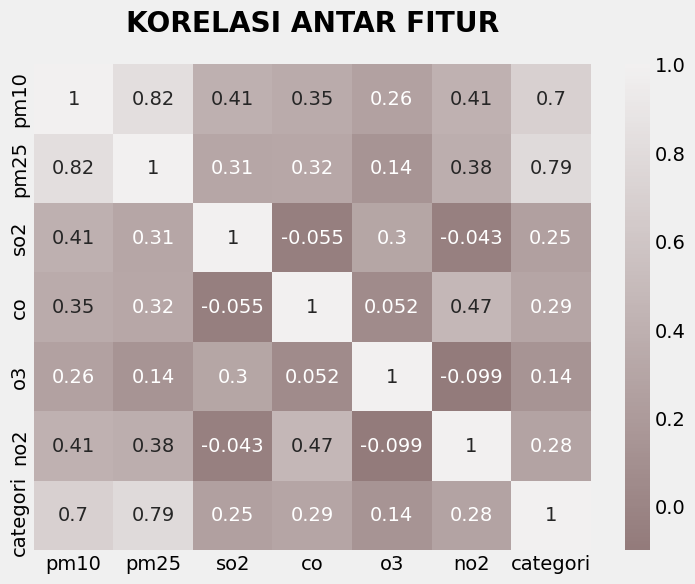

In [23]:
start_color = "#451A1A"
pal_corelation = sns.light_palette(start_color, n_colors=8, reverse=True, as_cmap=True)
corrmat = data_eda.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, cmap=pal_corelation, center=0)
plt.title('KORELASI ANTAR FITUR', fontweight='bold', y=1.05)
plt.show()

Insight

- Kualitas udara di suatu wilayah dapat diprediksi dengan cukup akurat menggunakan nilai PM2.5. Hal ini ditunjukkan oleh nilai korelasi antara PM2.5 dan kategori kualitas udara yang tinggi, yaitu 0.79.

- PM10 dan PM2.5 memiliki korelasi yang tinggi, yaitu 0.82. Hal ini menunjukkan bahwa kedua jenis partikel polutan tersebut memiliki sumber yang sama. Sumber PM10 dan PM2.5 yang paling umum adalah pembakaran bahan bakar fosil, proses industri, dan aktivitas lalu lintas.

Berdasarkan kedua insight tersebut, dapat disimpulkan bahwa kualitas udara di suatu wilayah dapat diprediksi dengan cukup akurat menggunakan nilai PM2.5. Namun, nilai PM10 juga dapat digunakan untuk memprediksi kualitas udara, karena kedua jenis partikel polutan tersebut memiliki sumber yang sama.

Untuk meningkatkan kualitas udara di suatu wilayah, perlu dilakukan upaya-upaya untuk mengurangi emisi PM10 dan PM2.5. Upaya-upaya tersebut dapat berupa:

    1. Pemanfaatan energi terbarukan, seperti energi matahari dan angin, untuk menggantikan penggunaan bahan bakar fosil.
    2. Peningkatan efisiensi energi dalam proses industri dan transportasi.
    3. Pemanfaatan teknologi untuk menangkap dan mengurangi emisi PM10 dan PM2.5.

### **c. BOXPLOT**

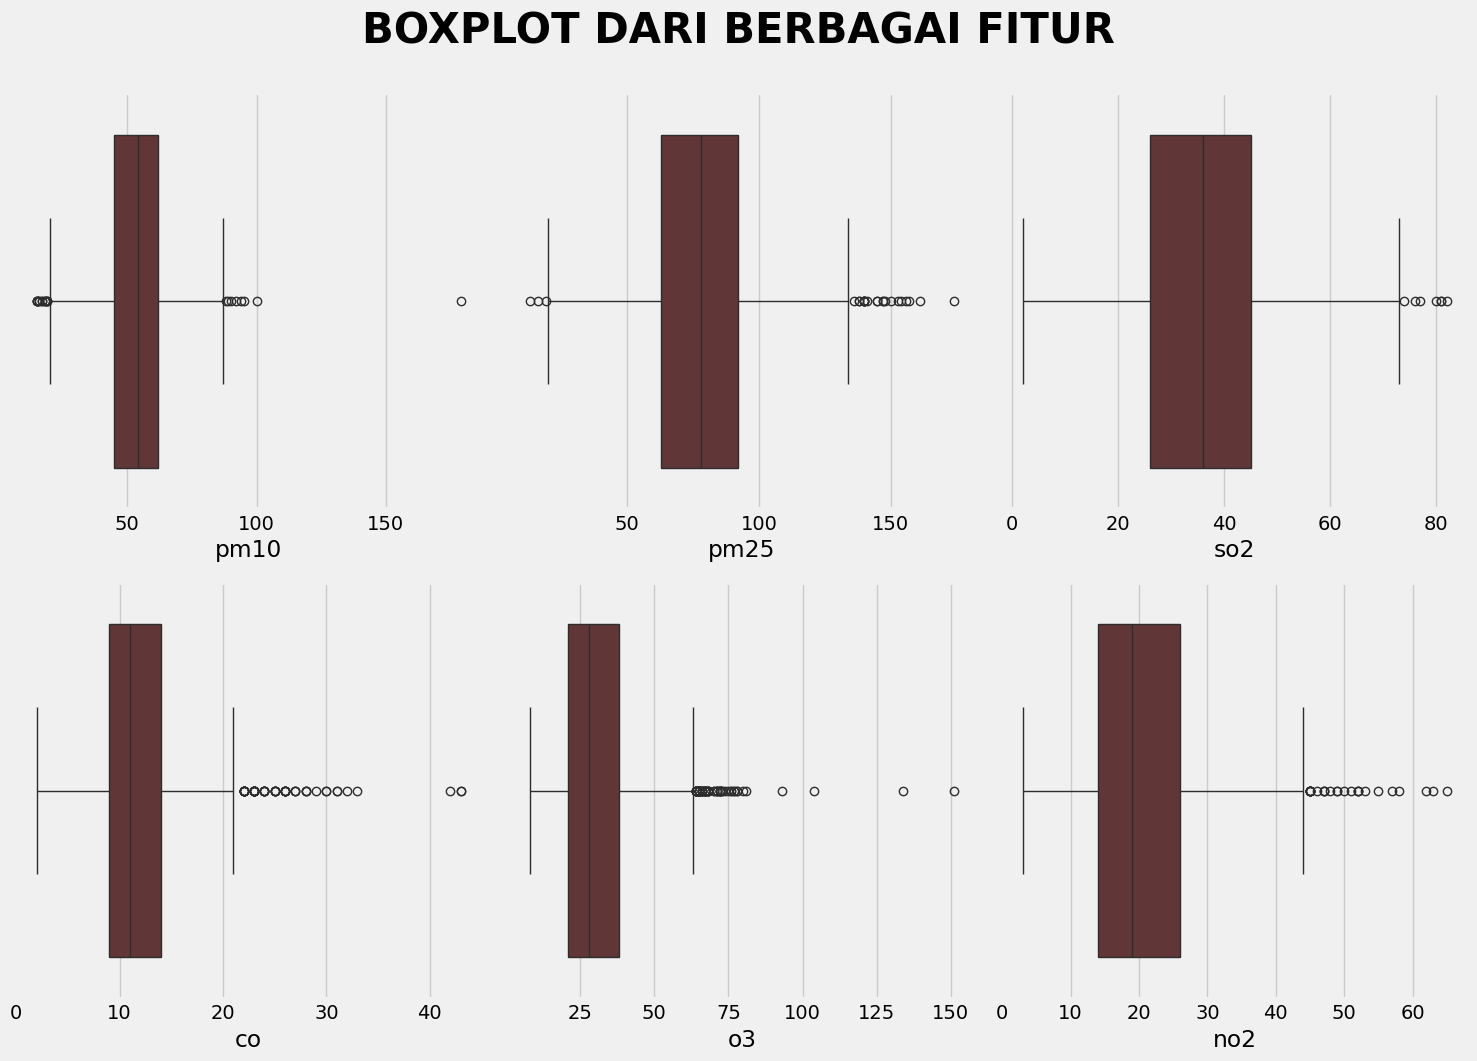

In [24]:
exclude_column = 'categori'
numeric_columns = data.select_dtypes(include='number').columns
numeric_columns = numeric_columns[numeric_columns != exclude_column]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i], palette=pal)
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('BOXPLOT DARI BERBAGAI FITUR', fontweight='bold', y=1, fontsize=30)
plt.tight_layout()
plt.show()

Penyebaran data pada BloxPlot:
1. Beberapa nilai PM 10 berada di bawah kuartil pertama (Q1) namun melampaui kuartil ketiga (Q3).
2. Pola serupa terlihat pada nilai PM 25, di mana beberapa nilai lebih rendah dari Q1 tetapi melebihi Q3.
3. SO2 menunjukkan penyebaran outliers yang cenderung melebihi nilai Q3 sebesar 70.
4. CO juga memiliki penyebaran outliers yang condong ke arah nilai yang lebih tinggi dari Q3, yakni sebesar 22.
5. Nilai outliers O3 juga menonjol dengan penyebaran yang lebih condong ke nilai di atas Q3, yaitu sebesar 65.
6. Outliers pada NO2 juga cenderung melebihi nilai Q3 sebesar 43, menandakan penyebaran yang signifikan di atas nilai median.

**Beberapa Rekomendasi:**

        1. Meningkatkan kualitas pengukuran kualitas udara. Pemerintah perlu memastikan bahwa pengukuran kualitas udara dilakukan dengan
        akurat dan sesuai dengan standar yang berlaku.
        2. Melakukan investigasi untuk mengidentifikasi sumber polusi udara. Pemerintah perlu melakukan investigasi untuk 
        mengidentifikasi sumber polusi udara yang menyebabkan outlier pada data kualitas udara.
        3. Meningkatkan kesadaran masyarakat tentang pentingnya melaporkan polusi udara. Pemerintah perlu meningkatkan kesadaran 
        masyarakat tentang pentingnya melaporkan polusi udara, sehingga pemerintah dapat mengambil tindakan yang tepat.

### **d. PAIRPLOT**

<Figure size 1000x1000 with 0 Axes>

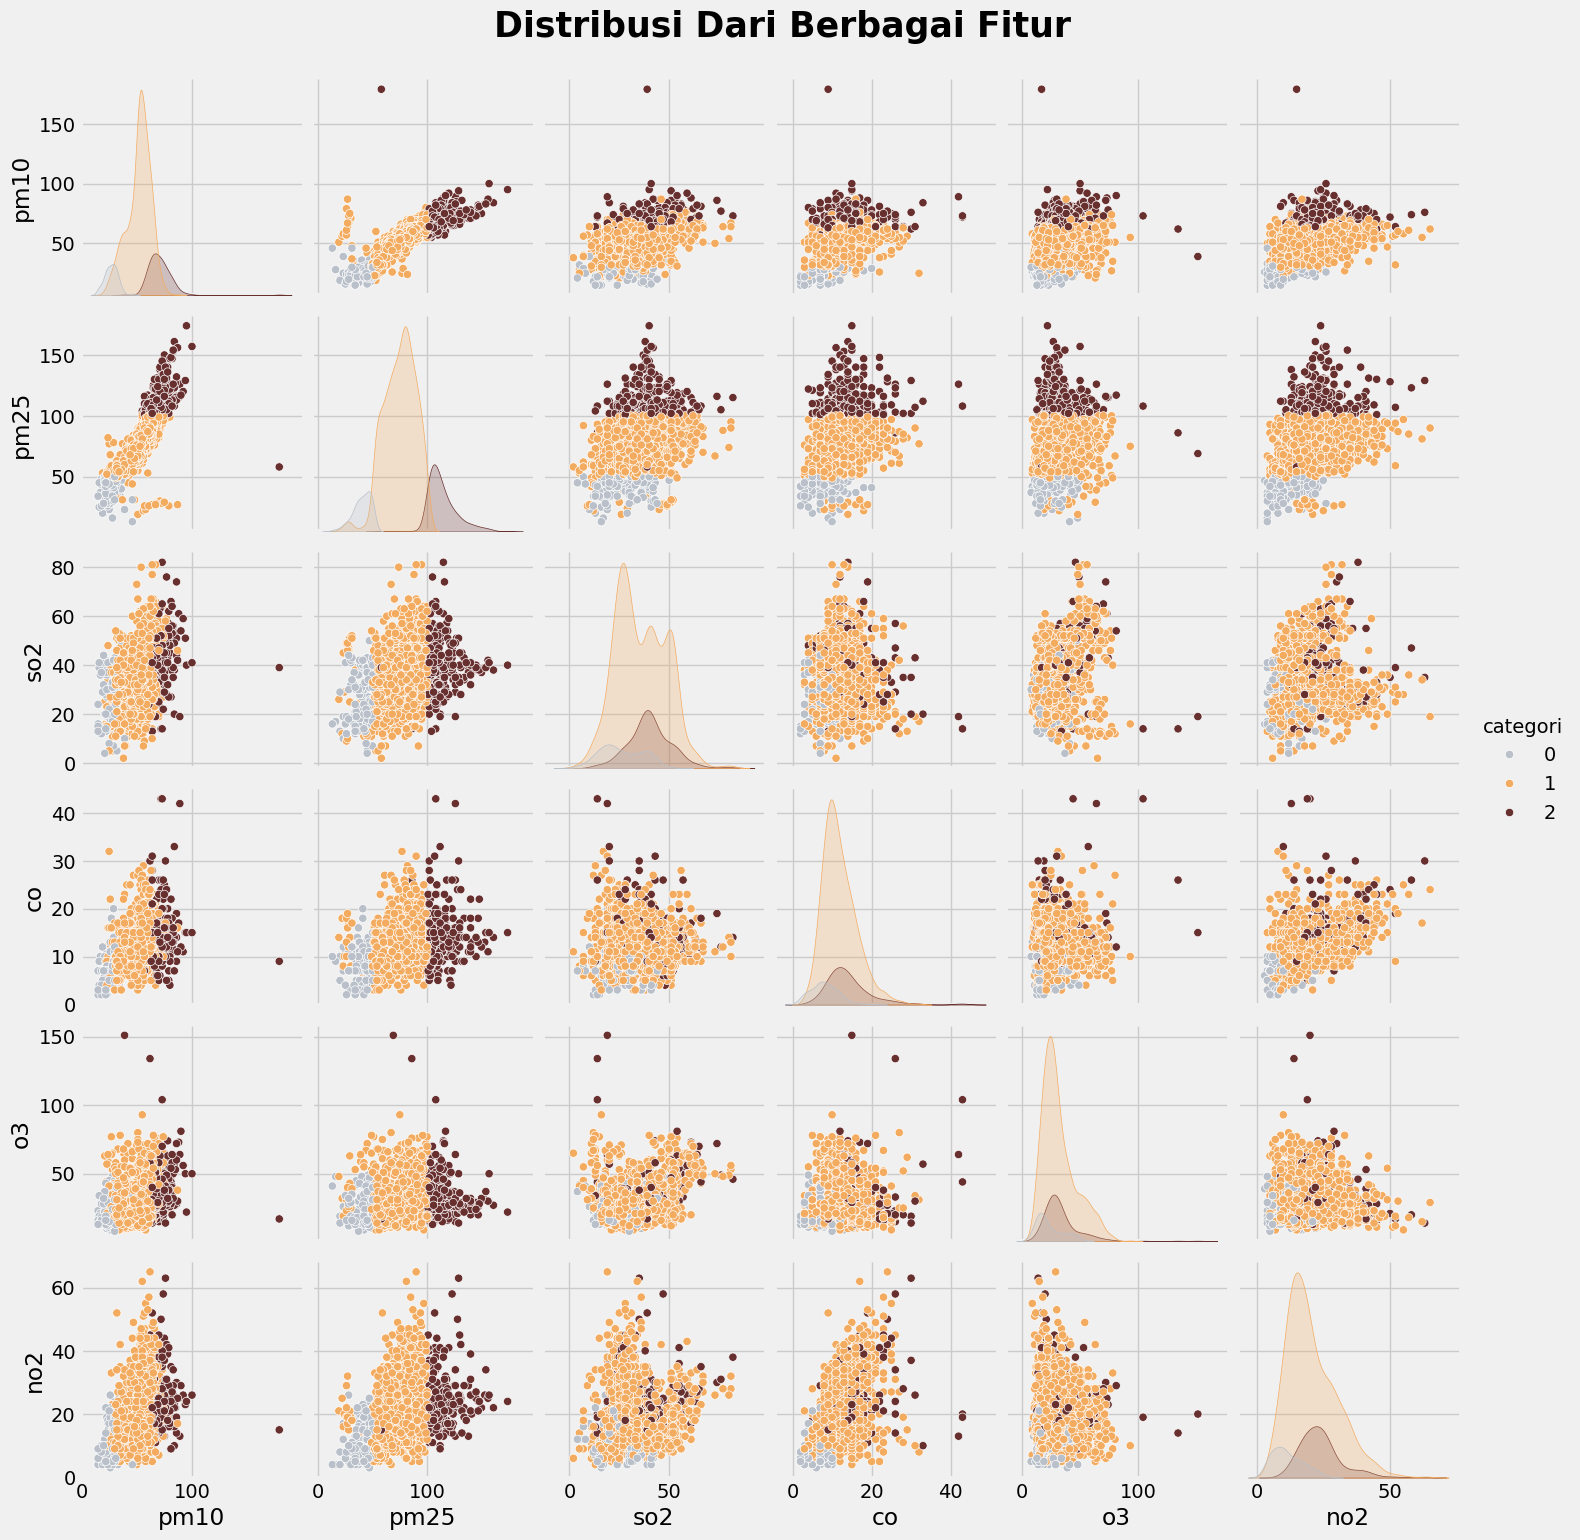

In [25]:
numerical_columns = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']
plt.figure(figsize=(10,10))
sns.pairplot(data_eda[numerical_columns + ['categori']], hue='categori', palette=pal_3)
plt.suptitle('Distribusi Dari Berbagai Fitur', y=1.03, fontsize=25, fontweight='bold')
plt.show()

Insight

Kualitas udara di wilayah tersebut secara umum berada pada kategori sedang. Hal ini ditunjukkan oleh distribusi data kategori sedang yang lebih tinggi dibandingkan kategori baik dan tidak sehat.

Pada fitur SO2, NO2, O3, dan CO, terdapat beberapa data yang memiliki nilai ketinggian data yang sama dan mengerucut pada satu posisi. Hal ini dapat disebabkan oleh beberapa faktor, antara lain:

    - Pengaruh cuaca dan iklim. Cuaca dan iklim dapat mempengaruhi konsentrasi polutan udara. Misalnya, pada hari yang cerah, konsentrasi ozon troposfer (O3) dapat meningkat.
    - Pengaruh aktivitas manusia. Aktivitas manusia, seperti pembakaran bahan bakar fosil, proses industri, dan aktivitas lalu lintas, juga dapat mempengaruhi konsentrasi polutan udara.<br><br>

Secara umum, sebaran data baik, sedang, dan tidak sehat memiliki tingkatan yang berbeda. Hal ini menunjukkan bahwa kualitas udara di wilayah tersebut dapat bervariasi dari waktu ke waktu. Berdasarkan ketiga insight tersebut, dapat disimpulkan bahwa kualitas udara di wilayah tersebut perlu terus dipantau untuk memastikan bahwa kualitas udara selalu berada dalam kondisi yang aman bagi kesehatan masyarakat. 

**Berikut adalah beberapa rekomendasi untuk meningkatkan kualitas udara di wilayah tersebut:**

        1. Peningkatan kesadaran masyarakat tentang pentingnya menjaga kualitas udara. Masyarakat perlu didorong untuk mengurangi penggunaan bahan bakar fosil dan melakukan aktivitas yang dapat mengurangi emisi polutan udara.
        2. Peningkatan regulasi pemerintah untuk mengurangi emisi polutan udara dari berbagai sumber. Pemerintah perlu menetapkan regulasi yang ketat untuk mengurangi emisi polutan udara dari berbagai sumber, seperti pembakaran bahan bakar fosil, proses industri, dan aktivitas lalu lintas.
        3. Peningkatan investasi dalam teknologi untuk menangkap dan mengurangi emisi polutan udara. Pemerintah dan swasta perlu berinvestasi dalam pengembangan teknologi untuk menangkap dan mengurangi emisi polutan udara.

### **e. PM 2.5 VS NO2**

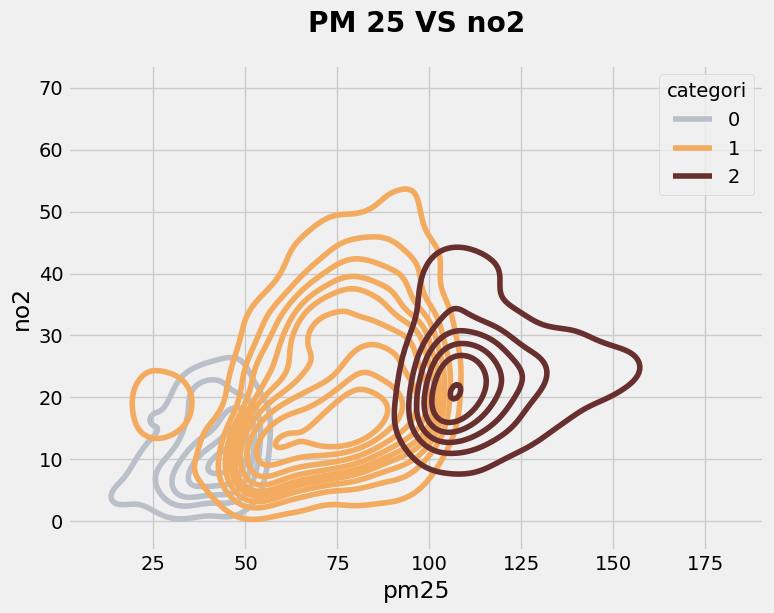

In [26]:
plt.figure(figsize=(8, 6))
pl = sns.kdeplot(data=data_eda, x=data_eda['pm25'], y=data_eda['no2'], hue=data_eda['categori'], palette=pal_3)
pl.set_title("PM 25 VS no2", fontweight='bold',y=1.05)
plt.show()

1. Pada kategori baik, penyebaran data konsentrasi NO2 dan PM2.5 cenderung terkonsentrasi pada nilai yang lebih rendah. Hal ini menunjukkan bahwa kualitas udara di kategori baik cenderung berada dalam kondisi yang baik.

2. Pada kategori sedang, penyebaran data konsentrasi NO2 dan PM2.5 cenderung terkonsentrasi pada nilai yang lebih tinggi dibandingkan kategori baik, tetapi masih berada dalam batas yang aman. Hal ini menunjukkan bahwa kualitas udara di kategori sedang cenderung berada dalam kondisi yang sedang.

3. Pada kategori tidak sehat, penyebaran data konsentrasi NO2 dan PM2.5 cenderung terkonsentrasi pada nilai yang lebih tinggi dibandingkan kategori sedang. Hal ini menunjukkan bahwa kualitas udara di kategori tidak sehat cenderung berada dalam kondisi yang tidak sehat.

Berikut adalah beberapa interpretasi yang dapat dilakukan dari temuan tersebut:
- Perbedaan penyebaran data konsentrasi NO2 dan PM2.5 antar kategori kualitas udara dapat disebabkan oleh beberapa faktor, antara lain:

    1. Sumber polutan udara. Sumber polutan udara yang berbeda dapat menghasilkan konsentrasi NO2 dan PM2.5 yang berbeda. Misalnya, pembakaran bahan - bakar fosil dapat menghasilkan konsentrasi NO2 dan PM2.5 yang tinggi.
    2. Faktor meteorologi. Faktor meteorologi, seperti angin dan hujan, dapat mempengaruhi distribusi polutan udara. Misalnya, angin dapat membawa - polutan udara dari satu lokasi ke lokasi lain.
    3. Faktor geografis. Faktor geografis, seperti topografi dan tutupan lahan, dapat mempengaruhi distribusi polutan udara. Misalnya, daerah dengan topografi yang berbukit-bukit dapat menjadi tempat terakumulasinya polutan udara.<br><br>

- Temuan tersebut dapat digunakan untuk meningkatkan pemahaman tentang hubungan antara kualitas udara dan konsentrasi polutan udara. Pemahaman ini dapat digunakan untuk mengembangkan kebijakan dan strategi untuk meningkatkan kualitas udara.

- Temuan tersebut juga dapat digunakan untuk meningkatkan kesadaran masyarakat tentang pentingnya menjaga kualitas udara. Masyarakat perlu didorong untuk mengurangi penggunaan bahan bakar fosil dan melakukan aktivitas yang dapat mengurangi emisi polutan udara.

### **f. SO2 VS PM 10**

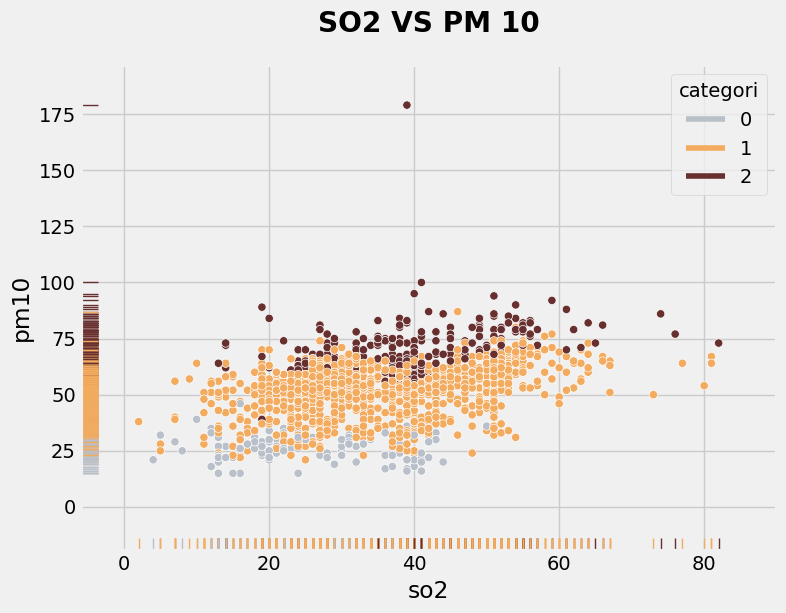

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_eda, x=data_eda['so2'], y=data_eda['pm10'], hue=data_eda['categori'], palette=pal_3)
sns.rugplot(data=data_eda, x=data_eda['so2'], y=data_eda['pm10'], hue=data_eda['categori'], palette=pal_3)
plt.title("SO2 VS PM 10", fontweight='bold',y=1.05)
plt.show()

Penyebaran data antara kategori sedang dan tidak sehat memiliki kecenderungan yang sama, yaitu berbentuk pola kurva parabola. Hal ini menunjukkan bahwa terdapat hubungan positif antara konsentrasi SO2 dan konsentrasi PM10. Artinya, konsentrasi SO2 cenderung meningkat seiring dengan meningkatnya konsentrasi PM10.

Beberapa contoh rekomendasi kebijakan dan strategi yang dapat dilakukan untuk mengurangi emisi SO2 dan PM10:

    1. Meningkatkan efisiensi pembakaran bahan bakar fosil
    2. Menggunakan energi terbarukan
    3. Menerapkan transportasi umum yang lebih efisien
    4. Meningkatkan kesadaran masyarakat tentang pentingnya menjaga kualitas udara

### **g. SO2 VS NO2**

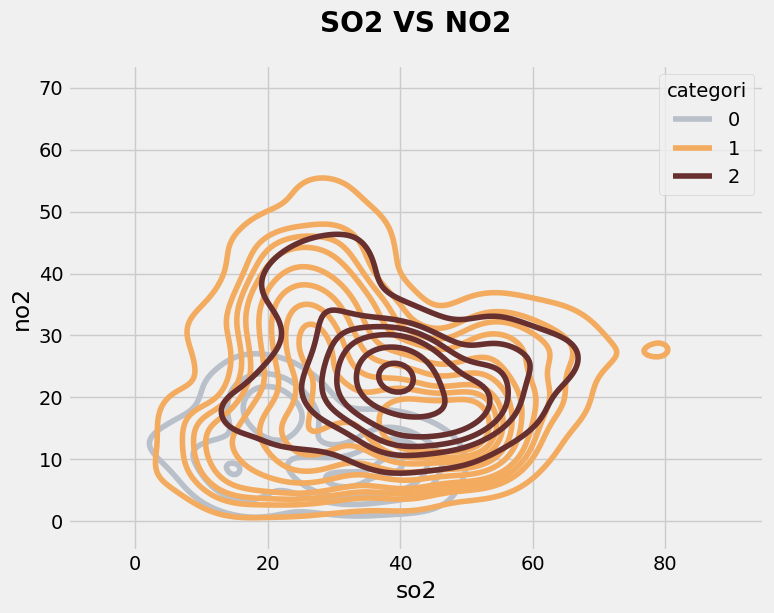

In [28]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data_eda, x=data_eda['so2'], y=data_eda['no2'], hue=data_eda['categori'], palette=pal_3)
plt.title("SO2 VS NO2", fontweight='bold',y=1.05)
plt.show()

Temuan bahwa data SO2 dan NO2 rata-rata tersebar secara berdampingan menunjukkan bahwa terdapat hubungan positif antara kedua polutan udara tersebut. Artinya, konsentrasi SO2 cenderung meningkat seiring dengan meningkatnya konsentrasi NO2.

Berikut adalah beberapa insights yang dapat diambil dari temuan tersebut:

    1. Kualitas udara perlu terus dipantau untuk memastikan bahwa kualitas udara selalu berada dalam kondisi yang aman bagi kesehatan masyarakat.
    2. Kebijakan dan strategi untuk mengurangi emisi SO2 dan NO2 perlu diprioritaskan untuk meningkatkan kualitas udara.
    3. Masyarakat perlu didorong untuk mengurangi penggunaan bahan bakar fosil dan melakukan aktivitas yang dapat mengurangi emisi SO2 dan NO2.

## **2. HANDLING DATA WITH ADASYN**

Tujuan menggunakan handling imbalanced data menggunakan **ADASYN** adalah untuk meningkatkan akurasi dan sensitivitas dari model klasifikasi yang digunakan. Imbalanced data adalah data yang memiliki distribusi kelas yang tidak seimbang, di mana salah satu kelas memiliki jumlah data yang jauh lebih banyak daripada kelas lainnya. Hal ini dapat menyebabkan model klasifikasi menjadi bias terhadap kelas yang memiliki jumlah data lebih banyak, sehingga dapat menyebabkan penurunan akurasi dan sensitivitas model.

**ADASYN** adalah metode resampling yang termasuk ke dalam kategori oversampling. Metode ini bekerja dengan cara mensintesis data baru dari kelas minoritas. Data sintetis ini dibuat dengan memperhatikan jarak antara data minoritas asli dengan data mayoritas. Hal ini dilakukan agar data sintetis yang dihasilkan dapat mewakili data minoritas asli dengan lebih baik.

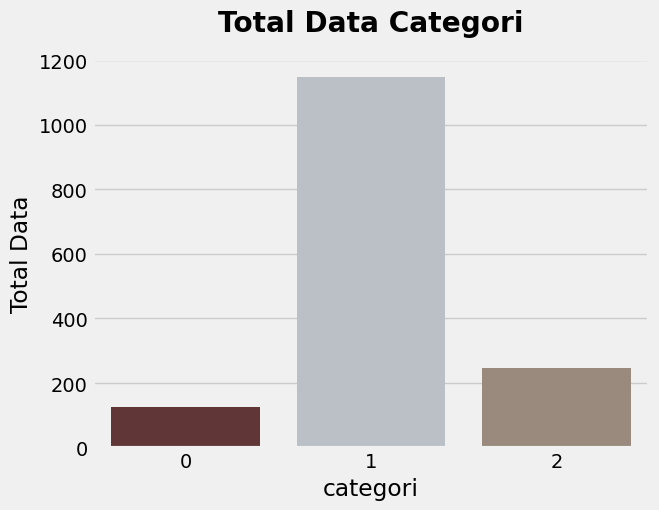

In [29]:
data_imbalanced = data.copy()

sns.countplot(data=data_imbalanced, x='categori', palette=pal)
plt.title('Total Data Categori', fontweight='bold', y=1.05)
plt.ylabel('Total Data')
plt.show()

In [30]:
columns = data_imbalanced.columns[data_imbalanced.columns != 'categori']

features_train = data_imbalanced[columns]
target_train = data_imbalanced['categori']

features_test = data_imbalanced[columns]
target_test = data_imbalanced['categori']

Penerapan Imbalanced data menggunakan ADASYN

In [31]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(features_train, target_train)
X_test_resampled, y_test_resampled = adasyn.fit_resample(features_test, target_test)

In [32]:
X_train_resampled.shape, y_train_resampled.shape, X_test_resampled.shape, y_test_resampled.shape

((3428, 6), (3428,), (3428, 6), (3428,))

In [33]:
y_train_resampled_array = np.array(y_train_resampled).reshape(-1, 1)
y_test_resampled_array = np.array(y_test_resampled).reshape(-1, 1)

train_data = np.concatenate((X_train_resampled, y_train_resampled_array), axis=1)
test_data = np.concatenate((X_test_resampled, y_test_resampled_array), axis=1)

combined_data = np.vstack((train_data, test_data))
columns = list(X_train_resampled.columns) + ['target']
combined_df = pd.DataFrame(combined_data, columns=columns)

combined_df.to_csv('../Data Sambling/data_sambling.csv', index=False)

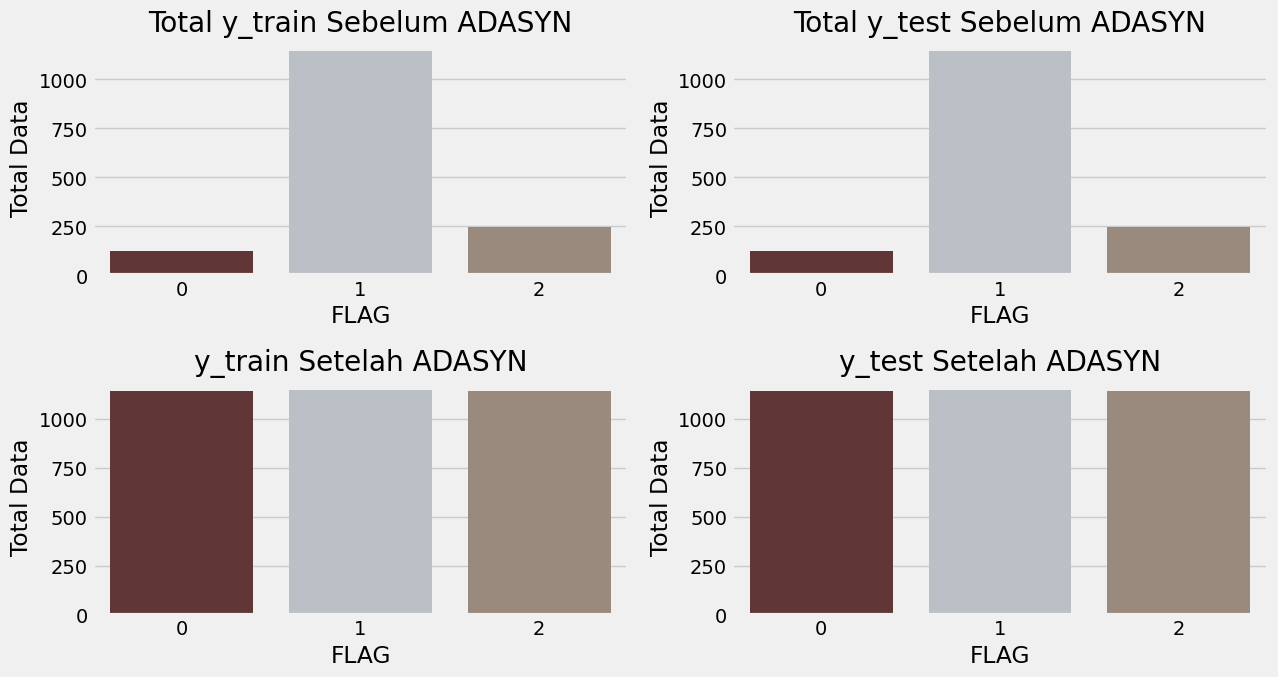

X_train_resampled shape: (3428, 6)
y_train_resampled shape: (3428,)
X_test_resampled shape: (3428, 6)
y_test_resampled shape: (3428,)


In [34]:
plt.figure(figsize=(13, 7))

plt.subplot(2, 2, 1)
sns.countplot(x=target_train, palette=pal)
plt.title('Total y_train Sebelum ADASYN')
plt.xlabel('FLAG')
plt.ylabel('Total Data')

plt.subplot(2, 2, 2)
sns.countplot(x=target_test, palette=pal)
plt.title('Total y_test Sebelum ADASYN')
plt.xlabel('FLAG')
plt.ylabel('Total Data')

plt.subplot(2, 2, 3)
sns.countplot(x=y_train_resampled, palette=pal)
plt.title('y_train Setelah ADASYN')
plt.xlabel('FLAG')
plt.ylabel('Total Data')

plt.subplot(2, 2, 4)
sns.countplot(x=y_test_resampled, palette=pal)
plt.title('y_test Setelah ADASYN')
plt.xlabel('FLAG')
plt.ylabel('Total Data')

plt.tight_layout()
plt.show()

print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("X_test_resampled shape:", X_test_resampled.shape)
print("y_test_resampled shape:", y_test_resampled.shape)

## **3. SPLITING**

In [35]:
from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifiers = {
    "SVM": SVC(probability=True),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Rocchio Classifier": NearestCentroid()
}

splits = [0.8, 0.75, 0.7, 0.65, 0.6, 0.5]

for clf_name, clf in classifiers.items():
    print(f"\nModel: {clf_name}\n{'=' * 40}")

    for split_ratio in splits:
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_resampled, y_train_resampled,
            test_size=1 - split_ratio, random_state=42
        )

        if clf_name == "Cat Boost":
            clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=10)
        else:
            clf.fit(X_train, y_train)

        y_pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)

        print(f"{clf_name} {split_ratio * 100:.0f}% Train Accuracy: {accuracy:.4f}")


Model: SVM
SVM 80% Train Accuracy: 0.9534
SVM 75% Train Accuracy: 0.9557
SVM 70% Train Accuracy: 0.9611
SVM 65% Train Accuracy: 0.9608
SVM 60% Train Accuracy: 0.9621
SVM 50% Train Accuracy: 0.9551

Model: Linear Discriminant Analysis
Linear Discriminant Analysis 80% Train Accuracy: 0.8790
Linear Discriminant Analysis 75% Train Accuracy: 0.8798
Linear Discriminant Analysis 70% Train Accuracy: 0.8834
Linear Discriminant Analysis 65% Train Accuracy: 0.8833
Linear Discriminant Analysis 60% Train Accuracy: 0.8892
Linear Discriminant Analysis 50% Train Accuracy: 0.8880

Model: Rocchio Classifier
Rocchio Classifier 80% Train Accuracy: 0.8776
Rocchio Classifier 75% Train Accuracy: 0.8786
Rocchio Classifier 70% Train Accuracy: 0.8785
Rocchio Classifier 65% Train Accuracy: 0.8775
Rocchio Classifier 60% Train Accuracy: 0.8790
Rocchio Classifier 50% Train Accuracy: 0.8816


The Best Learning Data Train Models:
1. SVM 60%
2. LDA 60%
3. ROCCHIO 50%

# **MODEL DEVELOPMENT**

## **1. TRAIN MODEL**

In [36]:
classifiers = {
    "SVM": SVC(probability=True),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Rocchio Classifier": NearestCentroid()
}

X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

results = {}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    if hasattr(clf, "predict_proba"):
        y_pred_proba = clf.predict_proba(X_val)[:, 1]
    else:
        y_pred_proba = clf.predict(X_val)
    
    y_pred = clf.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    
    results[clf_name] = {
        "Accuracy": accuracy,
        "Predictions": y_pred,
        "Predictions_proba": y_pred_proba
    }

for clf_name, metrics in results.items():
    print(f"{clf_name} Accuracy: {metrics['Accuracy']:.4f}")


SVM Accuracy: 0.9534
Linear Discriminant Analysis Accuracy: 0.8790
Rocchio Classifier Accuracy: 0.8776


Memilih Model SVM, LDA, dan Rocchio

## **2. HYPERPARAMETERS TUNING DATA ADASYN**

**SVM**

In [37]:
def objective_svm(trial):
    params = {
        "C": trial.suggest_float("C", 0.1, 10.0),
        "kernel": trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"]),
        "degree": trial.suggest_int("degree", 2, 5),
        "gamma": trial.suggest_float("gamma", 1e-4, 10.0, log=True),
        "random_state": 42
    }

    X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.4, random_state=42)

    model = SVC(**params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

study_svm = optuna.create_study(direction="maximize")
study_svm.optimize(objective_svm, n_trials=100)

top_trials_svm = sorted(study_svm.trials, key=lambda trial: trial.value, reverse=True)[:10]

for i, trial in enumerate(top_trials_svm, 1):
    print(f"Top {i} Trial - Accuracy: {trial.value:.4f}, Params: {trial.params}")

[I 2024-01-19 11:30:53,283] A new study created in memory with name: no-name-946787fb-9559-4dc9-ace3-92cb97f25784
[I 2024-01-19 11:30:55,663] Trial 0 finished with value: 0.9934402332361516 and parameters: {'C': 2.4445812647695653, 'kernel': 'poly', 'degree': 2, 'gamma': 0.060935866449088605}. Best is trial 0 with value: 0.9934402332361516.
[I 2024-01-19 11:30:56,928] Trial 1 finished with value: 0.9540816326530612 and parameters: {'C': 5.249954647517991, 'kernel': 'linear', 'degree': 2, 'gamma': 0.005708854060144811}. Best is trial 0 with value: 0.9934402332361516.
[I 2024-01-19 11:30:56,977] Trial 2 finished with value: 0.9963556851311953 and parameters: {'C': 8.136510560616395, 'kernel': 'poly', 'degree': 4, 'gamma': 0.0010941405361093216}. Best is trial 2 with value: 0.9963556851311953.
[I 2024-01-19 11:30:58,152] Trial 3 finished with value: 0.9540816326530612 and parameters: {'C': 4.678703774653114, 'kernel': 'linear', 'degree': 4, 'gamma': 0.4917740249084077}. Best is trial 2 wi

Top 1 Trial - Accuracy: 0.9971, Params: {'C': 6.769262140002202, 'kernel': 'poly', 'degree': 4, 'gamma': 0.0007075541169779631}
Top 2 Trial - Accuracy: 0.9971, Params: {'C': 6.402374811979337, 'kernel': 'poly', 'degree': 4, 'gamma': 0.0005258100263503435}
Top 3 Trial - Accuracy: 0.9971, Params: {'C': 6.865534124297559, 'kernel': 'poly', 'degree': 4, 'gamma': 0.0005554395329299536}
Top 4 Trial - Accuracy: 0.9964, Params: {'C': 8.136510560616395, 'kernel': 'poly', 'degree': 4, 'gamma': 0.0010941405361093216}
Top 5 Trial - Accuracy: 0.9964, Params: {'C': 7.038659844319728, 'kernel': 'poly', 'degree': 3, 'gamma': 0.0009568225515335335}
Top 6 Trial - Accuracy: 0.9964, Params: {'C': 8.276151712901665, 'kernel': 'poly', 'degree': 4, 'gamma': 0.0014149138546265287}
Top 7 Trial - Accuracy: 0.9964, Params: {'C': 6.7754000845363995, 'kernel': 'poly', 'degree': 4, 'gamma': 0.0005743432262887157}
Top 8 Trial - Accuracy: 0.9964, Params: {'C': 9.208353023993254, 'kernel': 'poly', 'degree': 4, 'gamma'

**LDA**

In [38]:
def objective_lda(trial):
    params = {
        "solver": trial.suggest_categorical("solver", ["svd", "lsqr", "eigen"]),
        "shrinkage": None,
        "n_components": trial.suggest_int("n_components", 1, min(X_train_resampled.shape[1], n_classes - 1)),
        "store_covariance": trial.suggest_categorical("store_covariance", [True, False])
    }

    if params["solver"] == "svd":
        params.pop("shrinkage")

    X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.4, random_state=42)

    model = LinearDiscriminantAnalysis(**params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

n_classes = len(set(y_train_resampled))

study_lda = optuna.create_study(direction="maximize")
study_lda.optimize(objective_lda, n_trials=100)

top_trials_lda = sorted(study_lda.trials, key=lambda trial: trial.value, reverse=True)[:10]

for i, trial in enumerate(top_trials_lda, 1):
    print(f"Top {i} Trial - Accuracy: {trial.value:.4f}, Params: {trial.params}")

[I 2024-01-19 11:31:16,076] A new study created in memory with name: no-name-2655d544-7fb5-42d9-9d61-d4b0af466367
[I 2024-01-19 11:31:16,085] Trial 0 finished with value: 0.8892128279883382 and parameters: {'solver': 'eigen', 'n_components': 1, 'store_covariance': True}. Best is trial 0 with value: 0.8892128279883382.
[I 2024-01-19 11:31:16,093] Trial 1 finished with value: 0.8892128279883382 and parameters: {'solver': 'svd', 'n_components': 2, 'store_covariance': False}. Best is trial 0 with value: 0.8892128279883382.
[I 2024-01-19 11:31:16,104] Trial 2 finished with value: 0.8892128279883382 and parameters: {'solver': 'eigen', 'n_components': 1, 'store_covariance': False}. Best is trial 0 with value: 0.8892128279883382.
[I 2024-01-19 11:31:16,114] Trial 3 finished with value: 0.8892128279883382 and parameters: {'solver': 'svd', 'n_components': 1, 'store_covariance': False}. Best is trial 0 with value: 0.8892128279883382.
[I 2024-01-19 11:31:16,126] Trial 4 finished with value: 0.8892

Top 1 Trial - Accuracy: 0.8892, Params: {'solver': 'eigen', 'n_components': 1, 'store_covariance': True}
Top 2 Trial - Accuracy: 0.8892, Params: {'solver': 'svd', 'n_components': 2, 'store_covariance': False}
Top 3 Trial - Accuracy: 0.8892, Params: {'solver': 'eigen', 'n_components': 1, 'store_covariance': False}
Top 4 Trial - Accuracy: 0.8892, Params: {'solver': 'svd', 'n_components': 1, 'store_covariance': False}
Top 5 Trial - Accuracy: 0.8892, Params: {'solver': 'lsqr', 'n_components': 2, 'store_covariance': False}
Top 6 Trial - Accuracy: 0.8892, Params: {'solver': 'lsqr', 'n_components': 2, 'store_covariance': True}
Top 7 Trial - Accuracy: 0.8892, Params: {'solver': 'lsqr', 'n_components': 1, 'store_covariance': False}
Top 8 Trial - Accuracy: 0.8892, Params: {'solver': 'svd', 'n_components': 1, 'store_covariance': False}
Top 9 Trial - Accuracy: 0.8892, Params: {'solver': 'lsqr', 'n_components': 1, 'store_covariance': True}
Top 10 Trial - Accuracy: 0.8892, Params: {'solver': 'eigen'

**ROCCHIO**

In [39]:
def objective_rocchio(trial):
    params = {
        "metric": trial.suggest_categorical("metric", ["euclidean", "manhattan", "chebyshev"]),
    }

    X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.5, random_state=42)

    model = NearestCentroid(**params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

study_rocchio = optuna.create_study(direction="maximize")
study_rocchio.optimize(objective_rocchio, n_trials=100)

top_trials_rocchio = sorted(study_rocchio.trials, key=lambda trial: trial.value, reverse=True)[:10]

for i, trial in enumerate(top_trials_rocchio, 1):
    print(f"Top {i} Trial - Accuracy: {trial.value:.4f}, Params: {trial.params}")

[I 2024-01-19 11:31:17,492] A new study created in memory with name: no-name-e23ef581-8424-4ce9-93ad-4788085a797d
[I 2024-01-19 11:31:17,508] Trial 0 finished with value: 0.8815635939323221 and parameters: {'metric': 'euclidean'}. Best is trial 0 with value: 0.8815635939323221.
[I 2024-01-19 11:31:17,516] Trial 1 finished with value: 0.8815635939323221 and parameters: {'metric': 'euclidean'}. Best is trial 0 with value: 0.8815635939323221.
[I 2024-01-19 11:31:17,524] Trial 2 finished with value: 0.8815635939323221 and parameters: {'metric': 'euclidean'}. Best is trial 0 with value: 0.8815635939323221.
[I 2024-01-19 11:31:17,532] Trial 3 finished with value: 0.8658109684947491 and parameters: {'metric': 'manhattan'}. Best is trial 0 with value: 0.8815635939323221.
[I 2024-01-19 11:31:17,540] Trial 4 finished with value: 0.8658109684947491 and parameters: {'metric': 'manhattan'}. Best is trial 0 with value: 0.8815635939323221.
[I 2024-01-19 11:31:17,548] Trial 5 finished with value: 0.88

Top 1 Trial - Accuracy: 0.8851, Params: {'metric': 'chebyshev'}
Top 2 Trial - Accuracy: 0.8851, Params: {'metric': 'chebyshev'}
Top 3 Trial - Accuracy: 0.8851, Params: {'metric': 'chebyshev'}
Top 4 Trial - Accuracy: 0.8851, Params: {'metric': 'chebyshev'}
Top 5 Trial - Accuracy: 0.8851, Params: {'metric': 'chebyshev'}
Top 6 Trial - Accuracy: 0.8851, Params: {'metric': 'chebyshev'}
Top 7 Trial - Accuracy: 0.8851, Params: {'metric': 'chebyshev'}
Top 8 Trial - Accuracy: 0.8851, Params: {'metric': 'chebyshev'}
Top 9 Trial - Accuracy: 0.8851, Params: {'metric': 'chebyshev'}
Top 10 Trial - Accuracy: 0.8851, Params: {'metric': 'chebyshev'}


## **3. CROSS VALIDATION & PREDICTIVE MODEL**

**SVC**

In [41]:
SVC_model = SVC(C=6.769262140002202,
                kernel='poly',
                degree=4,
                gamma=0.0007075541169779631,
                probability=True)

start_time = time.time()
X_train, X_val, y_train, y_val = train_test_split(
    X_train_resampled, y_train_resampled,
    test_size=0.2,
    random_state=42
)

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(stratified_kfold.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    SVC_model.fit(X_train_fold, y_train_fold)
    y_val_fold_pred = SVC_model.predict(X_val_fold)
    accuracy_fold = accuracy_score(y_val_fold, y_val_fold_pred)
    fold_accuracies.append(accuracy_fold)

    print(f"Fold {fold} Accuracy: {accuracy_fold:.4f}")

best_fold_index = np.argmax(fold_accuracies)
SVC_model.fit(X_train, y_train)

y_val_best_fold_pred = SVC_model.predict(X_val)

accuracy_best_fold = accuracy_score(y_val, y_val_best_fold_pred)
print(f"\nAccuracy best fold (Fold {best_fold_index + 1}): {accuracy_best_fold:.4f}")

svc_predictions = SVC_model.predict(X_test_resampled)
end_time = time.time()

svc_time = end_time - start_time
svc_accuracy = accuracy_score(y_test_resampled, svc_predictions)
svc_precision= precision_score(y_test_resampled, svc_predictions, average='weighted')
svc_recall = recall_score(y_test_resampled, svc_predictions, average='weighted')
svc_f1 = f1_score(y_test_resampled, svc_predictions, average='weighted')
svc_conf_matrix = classification_report(y_test_resampled, svc_predictions)

print(f"\nSVC MODELS:")
print(f"Time: {svc_time:.4f}")
print(f"Accuracy: {svc_accuracy:.4f}")
print(f"Precision: {svc_precision:.4f}")
print(f"Recall: {svc_recall:.4f}")
print(f"F1-Score: {svc_f1:.4f}\n")
print(f"Clasification:\n{svc_conf_matrix}")

Fold 1 Accuracy: 0.9964
Fold 2 Accuracy: 0.9964
Fold 3 Accuracy: 0.9854
Fold 4 Accuracy: 0.9927
Fold 5 Accuracy: 0.9854
Fold 6 Accuracy: 0.9927
Fold 7 Accuracy: 0.9964
Fold 8 Accuracy: 0.9891
Fold 9 Accuracy: 1.0000
Fold 10 Accuracy: 0.9891

Accuracy best fold (Fold 9): 0.9985

SVC MODELS:
Time: 2.4555
Accuracy: 0.9994
Precision: 0.9994
Recall: 0.9994
F1-Score: 0.9994

Clasification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1140
           1       1.00      1.00      1.00      1147
           2       1.00      1.00      1.00      1141

    accuracy                           1.00      3428
   macro avg       1.00      1.00      1.00      3428
weighted avg       1.00      1.00      1.00      3428



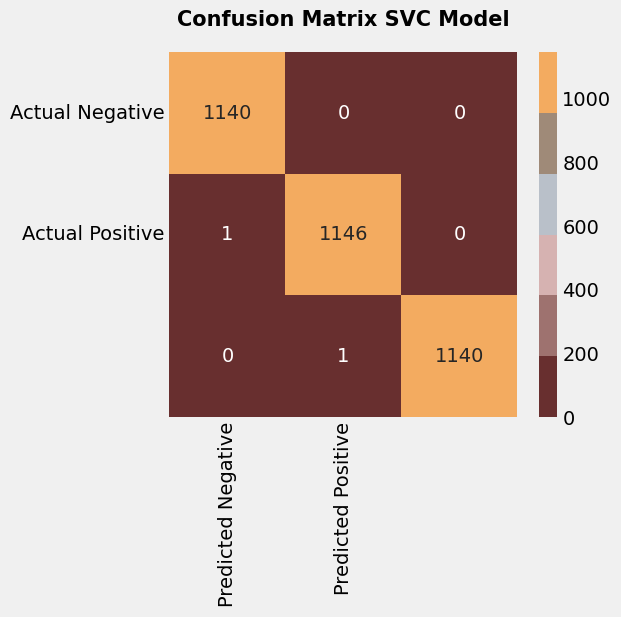

In [42]:
svc_confusion_matrix = confusion_matrix(y_test_resampled, svc_predictions)

plt.figure(figsize=(5, 4.5))
sns.heatmap(svc_confusion_matrix, annot=True, fmt='d', cmap=cmap, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix SVC Model', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

**LDA**

In [43]:
lda_model = LinearDiscriminantAnalysis(
    solver='eigen',
    n_components=1,
    store_covariance=True
)
    
start_time = time.time()
X_train, X_val, y_train, y_val = train_test_split(
    X_train_resampled, y_train_resampled,
    test_size=0.4,
    random_state=42
)

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(stratified_kfold.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    lda_model.fit(X_train_fold, y_train_fold)

    y_val_fold_pred = lda_model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_fold_pred)
    fold_accuracies.append(accuracy_fold)

    print(f"Fold {fold} Accuracy: {accuracy_fold:.4f}")

best_fold_index = np.argmax(fold_accuracies)

lda_model.fit(X_train, y_train)

y_val_best_fold_pred = lda_model.predict(X_val)

accuracy_best_fold = accuracy_score(y_val, y_val_best_fold_pred)
print(f"\nAccuracy on the validation set of the best fold (Fold {best_fold_index + 1}): {accuracy_best_fold:.4f}")

lda_predictions = lda_model.predict(X_test_resampled)
end_time = time.time()

lda_time = end_time - start_time
lda_accuracy = accuracy_score(y_test_resampled, lda_predictions)
lda_precision= precision_score(y_test_resampled, lda_predictions, average='weighted')
lda_recall = recall_score(y_test_resampled, lda_predictions, average='weighted')
lda_f1 = f1_score(y_test_resampled, lda_predictions, average='weighted')
lda_conf_matrix = classification_report(y_test_resampled, lda_predictions)

print(f"\nLDA MODELS:")
print(f"Time: {lda_time:.4f}")
print(f"Accuracy: {lda_accuracy:.4f}")
print(f"Precision: {lda_precision:.4f}")
print(f"Recall: {lda_recall:.4f}")
print(f"F1-Score: {lda_f1:.4f}\n")
print(f"Clasification:\n{lda_conf_matrix}")

Fold 1 Accuracy: 0.8786
Fold 2 Accuracy: 0.9029
Fold 3 Accuracy: 0.8738
Fold 4 Accuracy: 0.8738
Fold 5 Accuracy: 0.8641
Fold 6 Accuracy: 0.8835
Fold 7 Accuracy: 0.9122
Fold 8 Accuracy: 0.9122
Fold 9 Accuracy: 0.9073
Fold 10 Accuracy: 0.8732

Accuracy on the validation set of the best fold (Fold 7): 0.8892

LDA MODELS:
Time: 0.0558
Accuracy: 0.8894
Precision: 0.9030
Recall: 0.8894
F1-Score: 0.8832

Clasification:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1140
           1       0.99      0.68      0.80      1147
           2       0.87      0.99      0.92      1141

    accuracy                           0.89      3428
   macro avg       0.90      0.89      0.88      3428
weighted avg       0.90      0.89      0.88      3428



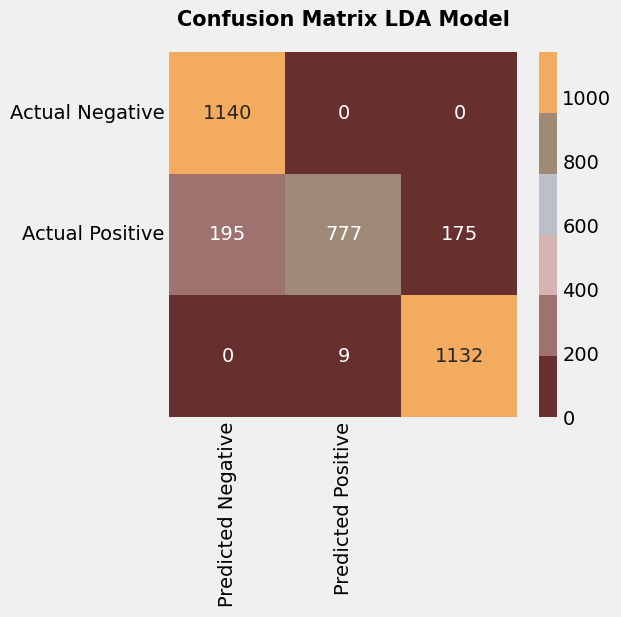

In [44]:
lda_confusion_matrix = confusion_matrix(y_test_resampled, lda_predictions)

plt.figure(figsize=(5, 4.5))
sns.heatmap(lda_confusion_matrix, annot=True, fmt='d', cmap=cmap, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix LDA Model', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

**ROCCHIO**

In [45]:
rocchio_model = NearestCentroid(metric='chebyshev')

X_train, X_val, y_train, y_val = train_test_split(
    X_train_resampled, y_train_resampled,
    test_size=0.5,
    random_state=42
)

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(stratified_kfold.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    rocchio_model.fit(X_train_fold, y_train_fold)

    y_val_fold_pred = rocchio_model.predict(X_val_fold)

    accuracy_fold = accuracy_score(y_val_fold, y_val_fold_pred)
    fold_accuracies.append(accuracy_fold)

    print(f"Fold {fold} Accuracy: {accuracy_fold:.4f}")

best_fold_index = np.argmax(fold_accuracies)

rocchio_model.fit(X_train, y_train)

y_val_best_fold_pred = rocchio_model.predict(X_val)

accuracy_best_fold = accuracy_score(y_val, y_val_best_fold_pred)
print(f"\nAccuracy on the validation set of the best fold (Fold {best_fold_index + 1}): {accuracy_best_fold:.4f}")

rocchio_predictions = rocchio_model.predict(X_test_resampled)
end_time = time.time()

rocchio_time = end_time - start_time
rocchio_accuracy = accuracy_score(y_test_resampled, rocchio_predictions)
rocchio_precision= precision_score(y_test_resampled, rocchio_predictions, average='weighted')
rocchio_recall = recall_score(y_test_resampled, rocchio_predictions, average='weighted')
rocchio_f1 = f1_score(y_test_resampled, rocchio_predictions, average='weighted')
rocchio_conf_matrix = classification_report(y_test_resampled, rocchio_predictions)

print(f"\nROCCHIO MODELS:")
print(f"Time: {rocchio_time:.4f}")
print(f"Accuracy: {rocchio_accuracy:.4f}")
print(f"Precision: {rocchio_precision:.4f}")
print(f"Recall: {rocchio_recall:.4f}")
print(f"F1-Score: {rocchio_f1:.4f}\n")
print(f"Clasification:\n{rocchio_conf_matrix}")

Fold 1 Accuracy: 0.8605
Fold 2 Accuracy: 0.8779
Fold 3 Accuracy: 0.8605
Fold 4 Accuracy: 0.8779
Fold 5 Accuracy: 0.8596
Fold 6 Accuracy: 0.8596
Fold 7 Accuracy: 0.8655
Fold 8 Accuracy: 0.8889
Fold 9 Accuracy: 0.8889
Fold 10 Accuracy: 0.8830

Accuracy on the validation set of the best fold (Fold 8): 0.8851

ROCCHIO MODELS:
Time: 9.2139
Accuracy: 0.8786
Precision: 0.8977
Recall: 0.8786
F1-Score: 0.8704

Clasification:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1140
           1       1.00      0.64      0.78      1147
           2       0.83      1.00      0.90      1141

    accuracy                           0.88      3428
   macro avg       0.90      0.88      0.87      3428
weighted avg       0.90      0.88      0.87      3428



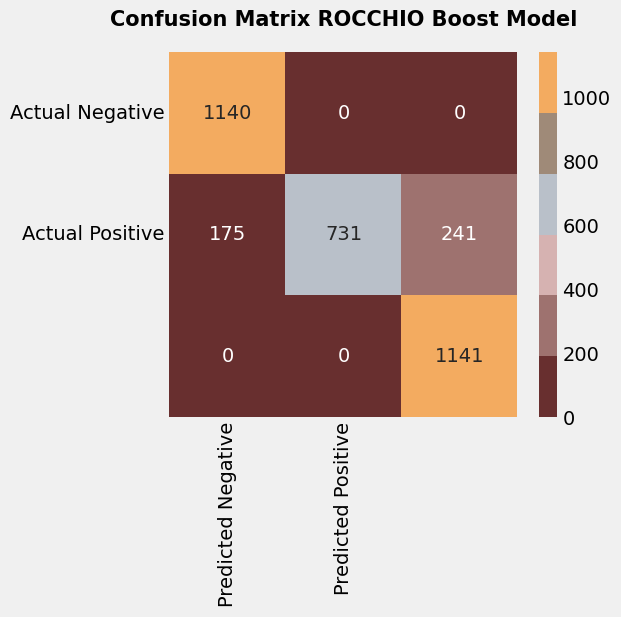

In [46]:
rocchio_confusion_matrix = confusion_matrix(y_test_resampled, rocchio_predictions)

plt.figure(figsize=(5, 4.5))
sns.heatmap(rocchio_confusion_matrix, annot=True, fmt='d', cmap=cmap, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix ROCCHIO Boost Model', fontsize=15, y=1.05, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

# **MODEL EVALUATION**

### **a. Time Model**
Perbandingan Time pada berbagai Algoritma

In [47]:
print("Time (Detik) Data ADASYN")
print(f"SVC: {svc_time}")
print(f"LDA: {lda_time}")
print(f"ROCCHIO: {rocchio_time}")

Time (Detik) Data ADASYN
SVC: 2.455495595932007
LDA: 0.055785179138183594
ROCCHIO: 9.213856220245361


### **b. Recall**
Perbandingan Recall pada berbagai Algoritma

In [48]:
print("Recall Data ADASYN")
print(f"SVC: {svc_recall}")
print(f"KNN: {lda_recall}")
print(f"Ada Boost: {rocchio_recall}")

Recall Data ADASYN
SVC: 0.9994165694282381
KNN: 0.8894399066511085
Ada Boost: 0.8786464410735122


### **c. F1 Score**
Perbandingan F1-Score pada berbagai Algoritma

In [49]:
print("F1 Score Data ADASYN")
print(f"SVC: {svc_f1}")
print(f"KNN: {lda_f1}")
print(f"Ada Boost: {rocchio_f1}")

F1 Score Data ADASYN
SVC: 0.9994165694282381
KNN: 0.8831767953194455
Ada Boost: 0.8703830305359259


### **d. Perbandingan Ploting**
Ploting Perbandingan Accuracy, Precision, dan Time 

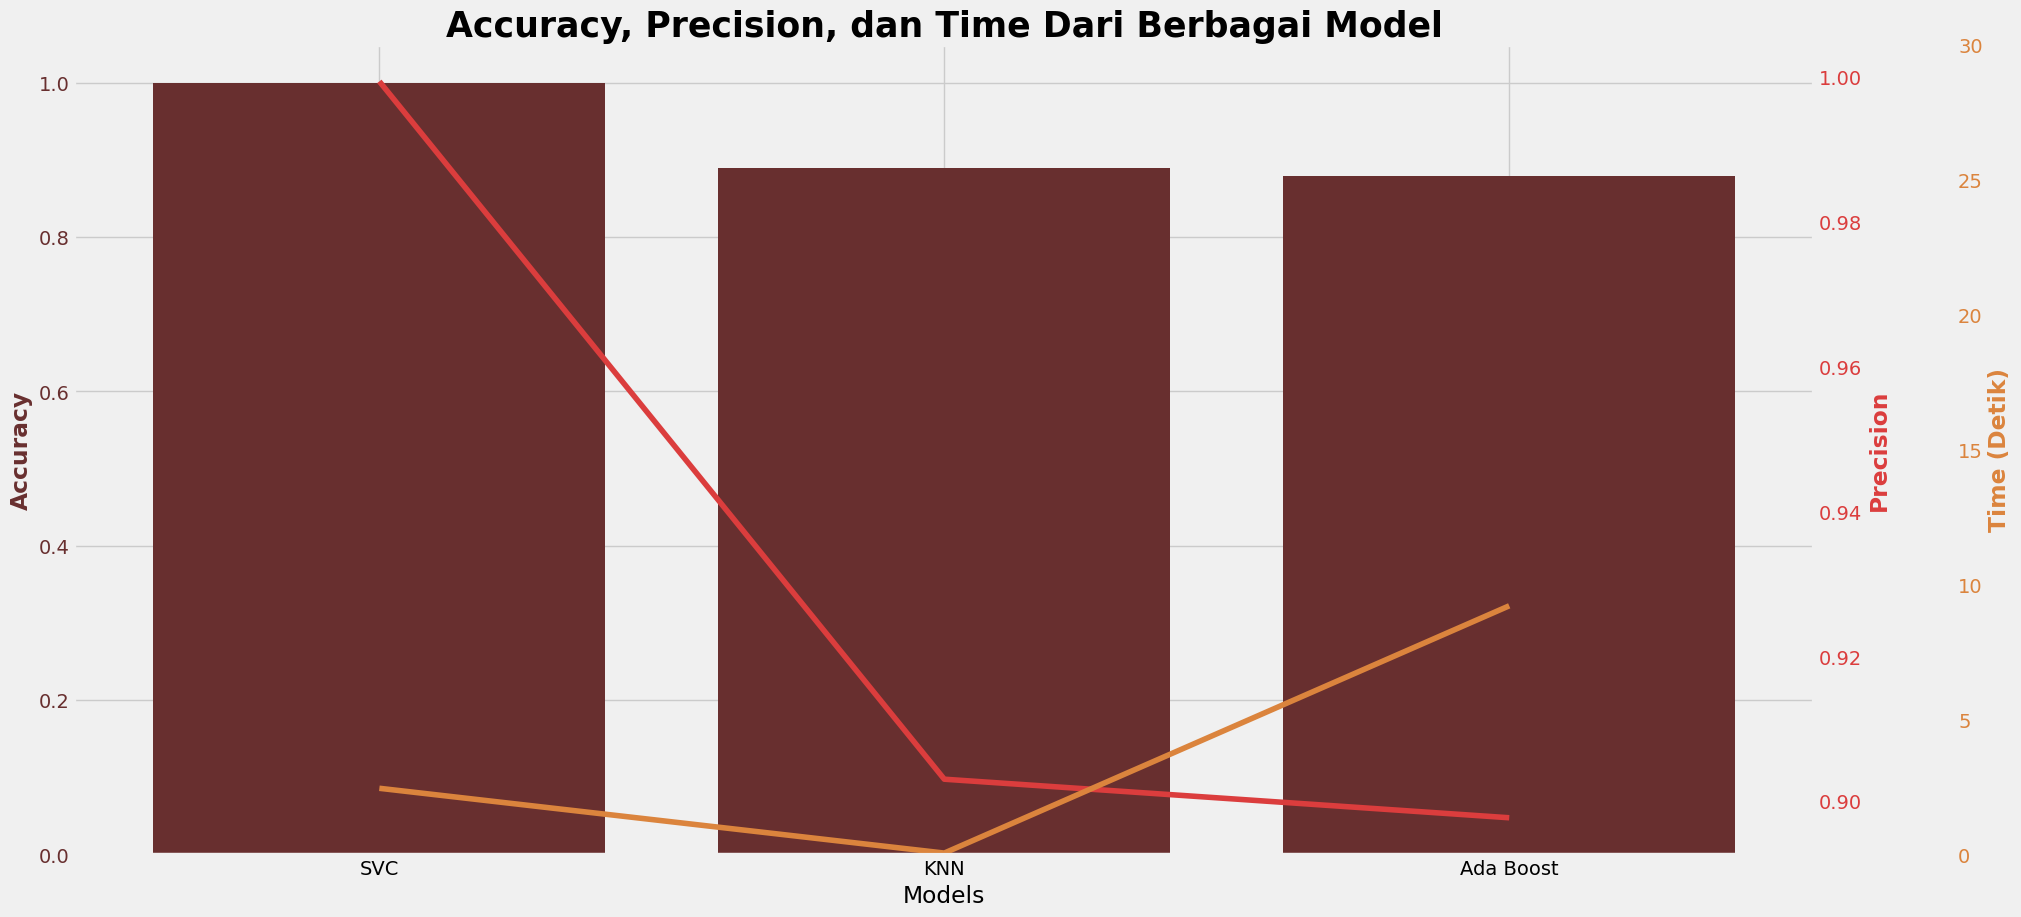

In [50]:
pal_3_for_plot = ['#682F2F', '#DB3D3D', '#DB843D']

models = ['SVC', 'KNN', 'Ada Boost']
accuracy_all = [svc_accuracy, lda_accuracy, rocchio_accuracy]
precision_all = [svc_precision, lda_precision, rocchio_precision]
time_all = [svc_time, lda_time, rocchio_time]

fig, ax1 = plt.subplots(figsize=(20, 10))

color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color=pal_3_for_plot[0], fontweight='bold')
ax1.bar(models, accuracy_all, color=pal_3_for_plot[0])
ax1.tick_params(axis='y', labelcolor=pal_3_for_plot[0])

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Precision', color=pal_3_for_plot[1], fontweight='bold')
ax2.plot(models, precision_all, color=pal_3_for_plot[1])
ax2.tick_params(axis='y', labelcolor=pal_3_for_plot[1])
ax2.grid(False)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 100))
color = 'tab:red'
ax3.set_ylabel('Time (Detik)', color=pal_3_for_plot[2], fontweight='bold')
ax3.plot(models, time_all, color=pal_3_for_plot[2])
ax3.tick_params(axis='y', labelcolor=pal_3_for_plot[2])
ax3.set_ylim(0, 30)
ax3.grid(False)
plt.title('Accuracy, Precision, dan Time Dari Berbagai Model', fontweight='bold', fontsize=25)
plt.show()

# **FEATURES IMPORTANT**

In [51]:
from sklearn.inspection import permutation_importance

result = permutation_importance(SVC_model, X_test_resampled, y_test_resampled, n_repeats=10, random_state=42)

svc_importance_df = pd.DataFrame({'Feature': X_test_resampled.columns, 'Importance': result.importances_mean})
svc_importance_df = svc_importance_df.sort_values(by='Importance', ascending=False)

print('Top 5 Features:')
print(svc_importance_df.head(5))

Top 5 Features:
  Feature  Importance
1    pm25    0.558022
0    pm10    0.200263
4      o3    0.058343
5     no2    0.042824
2     so2    0.037894


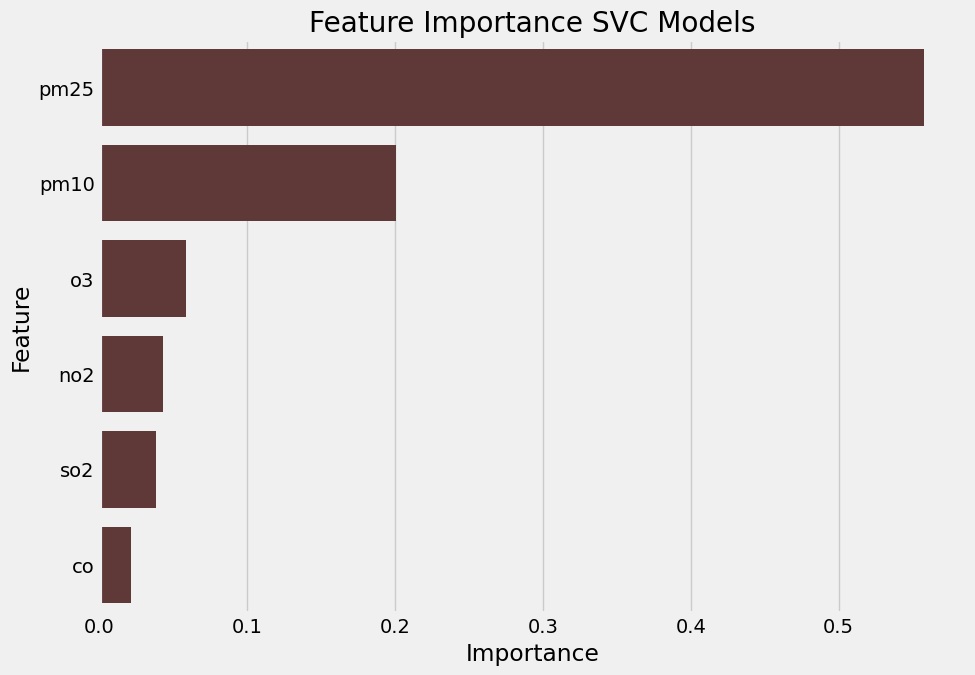

In [52]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=svc_importance_df, color="#682F2F", saturation=0.7, ci=None)
plt.title('Feature Importance SVC Models')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout(pad=-4)
plt.show()

# **RECOMENDATION**

Rekomendasi untuk Pemerintah untuk Meningkatkan Kualitas Udara:

1. Meningkatkan efisiensi pembakaran bahan bakar fosil
Emisi dari pembakaran bahan bakar fosil merupakan salah satu sumber utama polusi udara. Oleh karena itu, pemerintah perlu mendorong peningkatan efisiensi pembakaran bahan bakar fosil, baik pada kendaraan bermotor, industri, maupun pembangkit listrik.

2. Menggunakan energi terbarukan
Energi terbarukan, seperti energi matahari dan angin, tidak menghasilkan emisi polutan udara. Oleh karena itu, pemerintah perlu mendorong penggunaan energi terbarukan untuk menggantikan penggunaan bahan bakar fosil.

3. Menerapkan transportasi umum yang lebih efisien
Transportasi umum dapat mengurangi jumlah kendaraan bermotor di jalan raya, sehingga dapat mengurangi emisi polutan udara. Oleh karena itu, pemerintah perlu meningkatkan kualitas dan ketersediaan transportasi umum.

4. Meningkatkan kesadaran masyarakat tentang pentingnya menjaga kualitas udara
Masyarakat juga berperan penting dalam menjaga kualitas udara. Oleh karena itu, pemerintah perlu meningkatkan kesadaran masyarakat tentang pentingnya menjaga kualitas udara, misalnya dengan melakukan kampanye dan sosialisasi.

Berikut adalah beberapa rekomendasi spesifik yang dapat dilakukan pemerintah untuk meningkatkan kualitas udara:

1. Melakukan pemantauan kualitas udara secara rutin
Pemantauan kualitas udara secara rutin diperlukan untuk mengetahui kondisi kualitas udara di wilayah tersebut. Pemantauan ini dapat digunakan untuk memantau tren kualitas udara dan mengidentifikasi sumber polusi udara.

2. Menerapkan kebijakan ganjil genap atau car free day
Kebijakan ganjil genap atau car free day dapat mengurangi jumlah kendaraan bermotor di jalan raya, sehingga dapat mengurangi emisi polutan udara.

3. Meningkatkan penghijauan
Penanaman pohon dan tanaman hijau dapat membantu menyerap polutan udara. Oleh karena itu, pemerintah perlu mendorong penghijauan di wilayah tersebut.

Berikut adalah beberapa temuan menarik yang dapat sampaikan kepada pemerintah:

    1. Terdapat hubungan positif antara konsentrasi PM2.5 dan konsentrasi SO2, NO2, dan PM10. Hal ini menunjukkan bahwa polusi udara di wilayah tersebut didominasi oleh polutan udara yang berasal dari sumber yang sama, yaitu pembakaran bahan bakar fosil.
    2. Kualitas udara di wilayah tersebut cenderung menurun dari waktu ke waktu. Hal ini menunjukkan bahwa upaya pemerintah untuk meningkatkan kualitas udara belum cukup efektif.
    3. Terdapat perbedaan penyebaran data konsentrasi NO2 dan PM2.5 antar kategori kualitas udara. Hal ini menunjukkan bahwa kualitas udara di wilayah tersebut tidak merata.